In [1]:
import numpy as np
import torch
import pyvista as pv

from datasets.topological import (
    TopolocigalDataModule,
    TopologicalDataModuleConfig,
)

dm = TopolocigalDataModule(TopologicalDataModuleConfig())

for fullbatch in dm.train_dataloader():
    break


In [2]:


pl = pv.Plotter(shape=(8, 8), window_size=[800, 800])

for batch_idx in range(8):
    batch = fullbatch[8 * batch_idx : :]

    for idx in range(8):
        points = batch[idx].x.cpu().detach().numpy().reshape(-1, 3)
        pl.subplot(batch_idx, idx)
        actor = pl.add_points(
            points,
            style="points",
            emissive=False,
            show_scalar_bar=False,
            render_points_as_spheres=True,
            scalars=points[:, 2],
            point_size=3,
            ambient=0.2,
            diffuse=0.8,
            specular=0.8,
            specular_power=40,
            smooth_shading=True,
        )


pl.background_color = "k"
pl.link_views()
pl.camera_position = "yz"
pos = pl.camera.position
pl.camera.position = (pos[0], pos[1], pos[2] + 3)
pl.camera.azimuth = -45
pl.camera.elevation = 10

# create a top down light
light = pv.Light(
    position=(0, 0, 3), positional=True, cone_angle=50, exponent=20, intensity=0.2
)
pl.add_light(light)
pl.camera.zoom(0.8)
pl.show()



Widget(value='<iframe src="http://localhost:64311/index.html?ui=P_0x1bc7356c190_0&reconnect=auto" class="pyvis…

In [3]:
import torch
# x = torch.zeros(size=(20,20))
# x[10,10] = 1
# x[10,11] = 1
# x[11,11] = 1
# len(torch.nonzero(x, as_tuple=True)[0])


x = torch.rand(size=(256,128,2))



torch.cat([x, torch.zeros(size=(256,128,1))],dim=-1).shape


torch.Size([256, 128, 3])

In [4]:
from datasets.mnist import MnistDataModule, MnistDataModuleConfig


dm = MnistDataModule(MnistDataModuleConfig(root="./data/mnistpointcloud"))

C:\Users\ernst\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3527.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


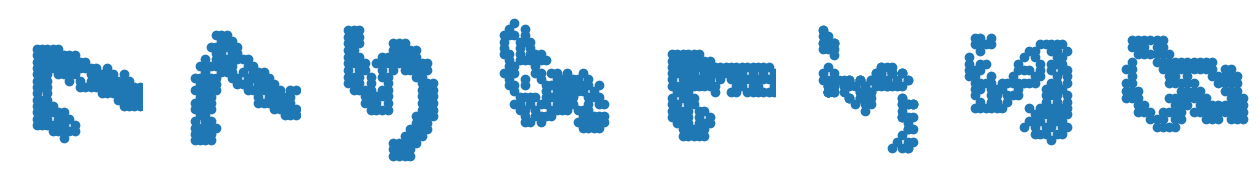

In [5]:
import matplotlib.pyplot as plt

for batch in dm.train_dataloader():
    break

fig,axes = plt.subplots(1,8,figsize=(16,2))


for idx, ax in enumerate(axes):
    pts = batch[idx].x.numpy()
    ax.axis("off")
    ax.scatter(pts[:,0],pts[:,1])
    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    




In [1]:
from datasets.tu import TUDataModule, TUBZRConfig


dm = TUDataModule(TUBZRConfig(use_node_attr=True))


dl = dm.train_dataloader()
for batch in dl:
    break


Processing...
Done!


In [2]:
dims = []
for batch in dl:
    for idx in range(batch.batch.max()):
        dims.append(batch[idx].x.shape[0])

In [6]:
batch[0].x.norm(dim=1).max()

tensor(0.9899)